# Create Latitude and Longitude Combinations

In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

from citipy import citipy
from config import weather_api_key
from datetime import datetime

In [2]:
# Build URL for Weather API call using my weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_lngs = zip(lats, lngs)
lats_lngs

**NOTE**: The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.

In [4]:
# Add the latitudes and longitudes to a list
coordinates = list(lats_lngs)
coordinates

[(32.05497842941705, -111.95682682556094),
 (-75.51273321891374, 17.55525074347503),
 (67.89586134023187, 107.77417139862217),
 (35.75743850324251, 79.49310480367114),
 (-64.8602539671208, -70.59079989810562),
 (-35.607076661058095, -88.5234582250533),
 (-22.017701309992333, 119.8276002230354),
 (-7.589040656374564, 17.106883933076574),
 (-51.230246811174524, -148.30389758511754),
 (21.57452203330689, 166.87216209727944),
 (62.456524587175494, 131.21349007845413),
 (62.80743052054896, -14.585328913111766),
 (3.207925504423031, 19.502446394586997),
 (-79.56410637486267, 8.074280838296943),
 (43.26911455070976, 171.68330334031464),
 (-17.367734416831937, 147.80650871468868),
 (8.874994820390583, 166.47932577164613),
 (-63.239332832983436, 56.32874849464733),
 (31.8466606683604, 176.8687146732687),
 (-9.62842477984691, -173.85238699148067),
 (24.1362088591936, -34.55031872310059),
 (-74.23219463947751, 152.39824452100027),
 (65.36797844132127, 146.909043172778),
 (39.81798530059331, 76.02

**NOTE**: To move forward with the next cell, we imported the citipy module so that we could get cities and countries. The citipy module finds the nearest city to the latitude and longitude pair with a population of 500 or more.

In [5]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the citiy count to confirm sufficient count
len(cities)

599

In [6]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing record {record_count} of Set {set_count} | {city}")
          
    # Add 1 to the record count
    record_count += 1

# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
          
        # Convert the data to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})

# If an error is experienced, skip the city          
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data loading is complete.
print("-----------------------------")
print("Data Retrieval Complete.     ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing record 1 of Set 1 | eloy
Processing record 2 of Set 1 | bredasdorp
Processing record 3 of Set 1 | aykhal
Processing record 4 of Set 1 | leh
Processing record 5 of Set 1 | ushuaia
Processing record 6 of Set 1 | lebu
Processing record 7 of Set 1 | port hedland
Processing record 8 of Set 1 | kasongo-lunda
Processing record 9 of Set 1 | mataura
Processing record 10 of Set 1 | butaritari
Processing record 11 of Set 1 | borogontsy
Processing record 12 of Set 1 | hofn
Processing record 13 of Set 1 | gemena
Processing record 14 of Set 1 | hermanus
Processing record 15 of Set 1 | nikolskoye
Processing record 16 of Set 1 | innisfail
Processing record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing record 18 of Set 1 | falealupo
City not found. Skipping...
Processing record 19 of Set 1 | ponta do sol
Processing record 20 of Set 1 | hobart
Processing record 21 of Set 1 | artyk
City not found. Skipping...
Processi

Processing record 37 of Set 4 | jos
Processing record 38 of Set 4 | vygonichi
Processing record 39 of Set 4 | chahal
Processing record 40 of Set 4 | hilo
Processing record 41 of Set 4 | victoria
Processing record 42 of Set 4 | punta de bombon
Processing record 43 of Set 4 | ngunguru
Processing record 44 of Set 4 | hun
Processing record 45 of Set 4 | severo-kurilsk
Processing record 46 of Set 4 | vestmannaeyjar
Processing record 47 of Set 4 | altamont
Processing record 48 of Set 4 | pictou
Processing record 49 of Set 4 | alta floresta
Processing record 50 of Set 4 | waitati
Processing record 1 of Set 5 | koslan
Processing record 2 of Set 5 | bengkulu
Processing record 3 of Set 5 | san cristobal
Processing record 4 of Set 5 | kapaa
Processing record 5 of Set 5 | tashla
Processing record 6 of Set 5 | porto novo
Processing record 7 of Set 5 | portland
Processing record 8 of Set 5 | louisbourg
City not found. Skipping...
Processing record 9 of Set 5 | mahebourg
Processing record 10 of Set 5

Processing record 29 of Set 8 | praia da vitoria
Processing record 30 of Set 8 | petropavlovsk-kamchatskiy
Processing record 31 of Set 8 | avera
Processing record 32 of Set 8 | pitea
Processing record 33 of Set 8 | katha
City not found. Skipping...
Processing record 34 of Set 8 | vega de alatorre
Processing record 35 of Set 8 | boa vista
Processing record 36 of Set 8 | mecca
Processing record 37 of Set 8 | puerto madryn
Processing record 38 of Set 8 | brookhaven
Processing record 39 of Set 8 | kamaishi
Processing record 40 of Set 8 | coahuayana
Processing record 41 of Set 8 | husavik
Processing record 42 of Set 8 | caluquembe
Processing record 43 of Set 8 | alvdal
Processing record 44 of Set 8 | buraydah
Processing record 45 of Set 8 | usolye-sibirskoye
Processing record 46 of Set 8 | syriam
Processing record 47 of Set 8 | olovyannaya
Processing record 48 of Set 8 | minden
Processing record 49 of Set 8 | labuan
Processing record 50 of Set 8 | atar
Processing record 1 of Set 9 | lorenga

Processing record 16 of Set 12 | sobolevo
Processing record 17 of Set 12 | adrar
Processing record 18 of Set 12 | santarem
Processing record 19 of Set 12 | ouesso
Processing record 20 of Set 12 | abilene
Processing record 21 of Set 12 | kalmunai
Processing record 22 of Set 12 | parsabad
Processing record 23 of Set 12 | douentza
Processing record 24 of Set 12 | huarmey
Processing record 25 of Set 12 | panguna
Processing record 26 of Set 12 | xai-xai
Processing record 27 of Set 12 | baoqing
Processing record 28 of Set 12 | itoigawa
Processing record 29 of Set 12 | puerto carreno
Processing record 30 of Set 12 | stromness
Processing record 31 of Set 12 | gushikawa
Processing record 32 of Set 12 | tahta
Processing record 33 of Set 12 | saint-joseph
Processing record 34 of Set 12 | axim
Processing record 35 of Set 12 | bonthe
Processing record 36 of Set 12 | ksenyevka
City not found. Skipping...
Processing record 37 of Set 12 | bowen
Processing record 38 of Set 12 | bull savanna
Processing 

In [7]:
len(city_data)

557

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Eloy,32.76,-111.55,66.00,88,90,8.05,US,2020-02-22 20:12:26
1,Bredasdorp,-34.53,20.04,66.20,68,93,11.41,ZA,2020-02-22 20:11:45
2,Aykhal,66.00,111.50,-7.60,83,99,4.47,RU,2020-02-22 20:12:27
3,Leh,34.17,77.58,-5.22,54,0,3.06,IN,2020-02-22 20:12:27
4,Ushuaia,-54.80,-68.30,69.80,46,40,4.70,AR,2020-02-22 20:11:24
5,Lebu,-37.62,-73.65,66.42,62,15,5.06,CL,2020-02-22 20:12:28
6,Port Hedland,-20.32,118.57,78.80,88,46,5.82,AU,2020-02-22 20:11:31
7,Kasongo-Lunda,-6.47,16.82,71.71,92,100,0.69,CD,2020-02-22 20:12:28
8,Mataura,-46.19,168.86,55.99,79,70,5.99,NZ,2020-02-22 20:12:28
9,Butaritari,3.07,172.79,83.89,75,94,6.55,KI,2020-02-22 20:12:29


In [9]:
# Reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Eloy,US,2020-02-22 20:12:26,32.76,-111.55,66.00,88,90,8.05
1,Bredasdorp,ZA,2020-02-22 20:11:45,-34.53,20.04,66.20,68,93,11.41
2,Aykhal,RU,2020-02-22 20:12:27,66.00,111.50,-7.60,83,99,4.47
3,Leh,IN,2020-02-22 20:12:27,34.17,77.58,-5.22,54,0,3.06
4,Ushuaia,AR,2020-02-22 20:11:24,-54.80,-68.30,69.80,46,40,4.70
5,Lebu,CL,2020-02-22 20:12:28,-37.62,-73.65,66.42,62,15,5.06
6,Port Hedland,AU,2020-02-22 20:11:31,-20.32,118.57,78.80,88,46,5.82
7,Kasongo-Lunda,CD,2020-02-22 20:12:28,-6.47,16.82,71.71,92,100,0.69
8,Mataura,NZ,2020-02-22 20:12:28,-46.19,168.86,55.99,79,70,5.99
9,Butaritari,KI,2020-02-22 20:12:29,3.07,172.79,83.89,75,94,6.55


In [10]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City Data DataFrame into a CSV file
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Get Data for Plotting

In [11]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module
import time

# Get today's date in seconds and convert the string to today's date.
today = time.strftime("%x")
today

'02/22/20'

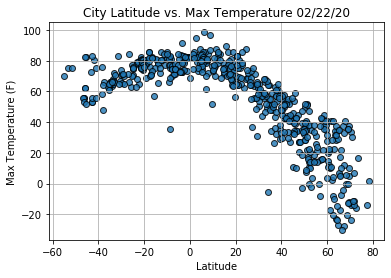

In [24]:
# Build the scatter plot for latitude vs. max tempature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

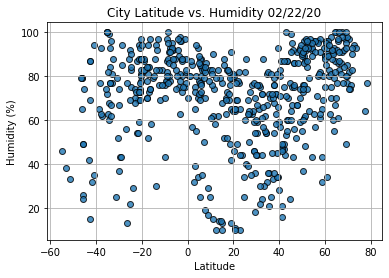

In [25]:
# Build a scatter plot for latitude vs. humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorportate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel(f"Humidity (%)")
plt.xlabel(f"Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

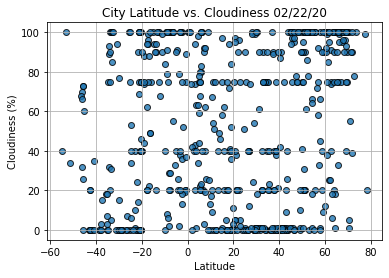

In [26]:
# # Build the scatter plot for Latitude vs. Cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel(f"Cloudiness (%)")
plt.xlabel(f"Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

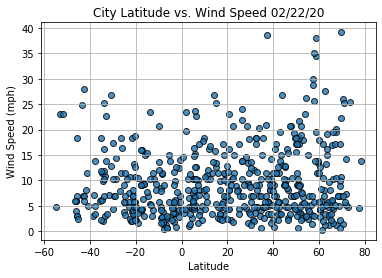

In [27]:
# Build the scatter plot for Latitude vs. Wind Speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel(f"Wind Speed (mph)")
plt.xlabel(f"Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig4.png")

# Show plt
plt.show()